In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from decimal import Decimal

GenNO22017 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_NO2_20170101-20171231.csv")

GenNO22017 = GenNO22017.replace('n/e', np.NaN)
GenNO22017 = GenNO22017.replace('N/A', np.NaN)

#GenNO22017.iloc[:,11:13] = GenNO22017.iloc[:,11:13].replace(np.NaN, 0)

GenNO22017 = pd.DataFrame({'Date': GenNO22017.iloc[:,1],
                          'Nuclear [MWh]': GenNO22017.iloc[:,16],
                          'Biomass [MWh]': GenNO22017.iloc[:,20],
                          'Gas [MWh]': GenNO22017.iloc[:,5],
                          'Coal [MWh]': GenNO22017.iloc[:,6],
                          'Oil [MWh]': GenNO22017.iloc[:,7],
                          'PSH [MWh]': GenNO22017.iloc[:,11] - GenNO22017.iloc[:,12],
                          'Hydro [MWh]': GenNO22017.iloc[:,13] + GenNO22017.iloc[:,14],
                          'Solar [MWh]': GenNO22017.iloc[:,19],
                          'Wind [MWh]': GenNO22017.iloc[:,22]})

print(GenNO22017.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2017 00:00 - 01.01.2017 01:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       4229.0          NaN        69.0
1     01.01.2017 01:00 - 01.01.2017 02:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       4176.0          NaN        63.0
2     01.01.2017 02:00 - 01.01.2017 03:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       4139.0          NaN        58.0
3     01.01.2017 03:00 - 01.01.2017 04:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       4054.0          NaN        55.0
4     01.01.2017 04:00 - 01.01.2017 05:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       4033.0          NaN        50.0
5   

In [21]:
def function():
    result = []
    for i in range(0, len(GenNO22017.iloc[:,0])):
        if i < 84:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22017.iloc[start,0]
            opNu = sum(GenNO22017.iloc[start:end,1])
            opBi = sum(GenNO22017.iloc[start:end,2])
            opGa = sum(GenNO22017.iloc[start:end,3])
            opCo = sum(GenNO22017.iloc[start:end,4])
            opOi = sum(GenNO22017.iloc[start:end,5])
            opPS = sum(GenNO22017.iloc[start:end,6])
            opHy = sum(GenNO22017.iloc[start:end,7])
            opSo = sum(GenNO22017.iloc[start:end,8])
            opWi = sum(GenNO22017.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 84: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2018
            end = 2040
            day = GenNO22017.iloc[start,0]
            opNu = sum(GenNO22017.iloc[start:skip,1]) + sum(GenNO22017.iloc[(skip+1):end,1])
            opBi = sum(GenNO22017.iloc[start:skip,2]) + sum(GenNO22017.iloc[(skip+1):end,2])
            opGa = sum(GenNO22017.iloc[start:skip,3]) + sum(GenNO22017.iloc[(skip+1):end,3])
            opCo = sum(GenNO22017.iloc[start:skip,4]) + sum(GenNO22017.iloc[(skip+1):end,4])
            opOi = sum(GenNO22017.iloc[start:skip,5]) + sum(GenNO22017.iloc[(skip+1):end,5])
            opPS = sum(GenNO22017.iloc[start:skip,6]) + sum(GenNO22017.iloc[(skip+1):end,6])
            opHy = sum(GenNO22017.iloc[start:skip,7]) + sum(GenNO22017.iloc[(skip+1):end,7])
            opSo = sum(GenNO22017.iloc[start:skip,8]) + sum(GenNO22017.iloc[(skip+1):end,8])
            opWi = sum(GenNO22017.iloc[start:skip,9]) + sum(GenNO22017.iloc[(skip+1):end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 85 <= i < 301:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22017.iloc[start,0]
            opNu = sum(GenNO22017.iloc[start:end,1])
            opBi = sum(GenNO22017.iloc[start:end,2])
            opGa = sum(GenNO22017.iloc[start:end,3])
            opCo = sum(GenNO22017.iloc[start:end,4])
            opOi = sum(GenNO22017.iloc[start:end,5])
            opPS = sum(GenNO22017.iloc[start:end,6])
            opHy = sum(GenNO22017.iloc[start:end,7])
            opSo = sum(GenNO22017.iloc[start:end,8])
            opWi = sum(GenNO22017.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 301:
            start = 24*i
            skip = 7227
            end = 7249
            day = GenNO22017.iloc[start,0]
            opNu = sum(GenNO22017.iloc[start:skip,1]) + sum(GenNO22017.iloc[skip+2:end,1])
            opBi = sum(GenNO22017.iloc[start:skip,2]) + sum(GenNO22017.iloc[skip+2:end,2])
            opGa = sum(GenNO22017.iloc[start:skip,3]) + sum(GenNO22017.iloc[skip+2:end,3])
            opCo = sum(GenNO22017.iloc[start:skip,4]) + sum(GenNO22017.iloc[skip+2:end,4])
            opOi = sum(GenNO22017.iloc[start:skip,5]) + sum(GenNO22017.iloc[skip+2:end,5])
            opPS = sum(GenNO22017.iloc[start:skip,6]) + sum(GenNO22017.iloc[skip+2:end,6])
            opHy = sum(GenNO22017.iloc[start:skip,7]) + sum(GenNO22017.iloc[skip+2:end,7])
            opSo = sum(GenNO22017.iloc[start:skip,8]) + sum(GenNO22017.iloc[skip+2:end,8])
            opWi = sum(GenNO22017.iloc[start:skip,9]) + sum(GenNO22017.iloc[skip+2:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 302 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenNO22017.iloc[start,0]
            opNu = sum(GenNO22017.iloc[start:end,1])
            opBi = sum(GenNO22017.iloc[start:end,2])
            opGa = sum(GenNO22017.iloc[start:end,3])
            opCo = sum(GenNO22017.iloc[start:end,4])
            opOi = sum(GenNO22017.iloc[start:end,5])
            opPS = sum(GenNO22017.iloc[start:end,6])
            opHy = sum(GenNO22017.iloc[start:end,7])
            opSo = sum(GenNO22017.iloc[start:end,8])
            opWi = sum(GenNO22017.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

NO2Gen2017 = function().round(2)
NO2Gen2017["Day"] = pd.date_range(start="1/1/2017", periods=365, freq="D")
print(NO2Gen2017.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2017-01-01            NaN            NaN       96.0         NaN        NaN        NaN     126076.0          NaN      2218.0
1   2017-01-02            NaN            NaN       96.0         NaN        NaN        NaN     186458.0          NaN      1111.0
2   2017-01-03            NaN            NaN       96.0         NaN        NaN        NaN     168601.0          NaN      4047.0
3   2017-01-04            NaN            NaN       96.0         NaN        NaN        NaN     163486.0          NaN      3710.0
4   2017-01-05            NaN            NaN       96.0         NaN        NaN        NaN     208773.0          NaN      1533.0
5   2017-01-06            NaN            NaN       96.0         NaN        NaN        NaN     192792.0          NaN      4291.0
6   2017-01-07            NaN            NaN       96.0         NaN        NaN        NaN     167231.0  

In [22]:
GenNO22018 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_NO2_20180101-20181231.csv")

GenNO22018 = GenNO22018.replace('n/e', np.NaN)
GenNO22018 = GenNO22018.replace('N/A', np.NaN)

#GenNO22018.iloc[:,11:13] = GenNO22018.iloc[:,11:13].replace(np.NaN, 0)

GenNO22018 = pd.DataFrame({'Date': GenNO22018.iloc[:,1],
                          'Nuclear [MWh]': GenNO22018.iloc[:,16],
                          'Biomass [MWh]': GenNO22018.iloc[:,20],
                          'Gas [MWh]': GenNO22018.iloc[:,5],
                          'Coal [MWh]': GenNO22018.iloc[:,6],
                          'Oil [MWh]': GenNO22018.iloc[:,7],
                          'PSH [MWh]': GenNO22018.iloc[:,11] - GenNO22018.iloc[:,12],
                          'Hydro [MWh]': GenNO22018.iloc[:,13] + GenNO22018.iloc[:,14],
                          'Solar [MWh]': GenNO22018.iloc[:,19],
                          'Wind [MWh]': GenNO22018.iloc[:,22]})

print(GenNO22018.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2018 00:00 - 01.01.2018 01:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       5560.0          NaN       471.0
1     01.01.2018 01:00 - 01.01.2018 02:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       5725.0          NaN       457.0
2     01.01.2018 02:00 - 01.01.2018 03:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       5000.0          NaN       440.0
3     01.01.2018 03:00 - 01.01.2018 04:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       4343.0          NaN       421.0
4     01.01.2018 04:00 - 01.01.2018 05:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       4303.0          NaN       407.0
5   

In [23]:
def function():
    result = []
    for i in range(0, len(GenNO22018.iloc[:,0])):
        if i < 83:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22018.iloc[start,0]
            opNu = sum(GenNO22018.iloc[start:end,1])
            opBi = sum(GenNO22018.iloc[start:end,2])
            opGa = sum(GenNO22018.iloc[start:end,3])
            opCo = sum(GenNO22018.iloc[start:end,4])
            opOi = sum(GenNO22018.iloc[start:end,5])
            opPS = sum(GenNO22018.iloc[start:end,6])
            opHy = sum(GenNO22018.iloc[start:end,7])
            opSo = sum(GenNO22018.iloc[start:end,8])
            opWi = sum(GenNO22018.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 83: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 1994
            end = 2016
            day = GenNO22018.iloc[start,0]
            opNu = sum(GenNO22018.iloc[start:skip,1]) + sum(GenNO22018.iloc[skip+1:end,1])
            opBi = sum(GenNO22018.iloc[start:skip,2]) + sum(GenNO22018.iloc[skip+1:end,2])
            opGa = sum(GenNO22018.iloc[start:skip,3]) + sum(GenNO22018.iloc[skip+1:end,3])
            opCo = sum(GenNO22018.iloc[start:skip,4]) + sum(GenNO22018.iloc[skip+1:end,4])
            opOi = sum(GenNO22018.iloc[start:skip,5]) + sum(GenNO22018.iloc[skip+1:end,5])
            opPS = sum(GenNO22018.iloc[start:skip,6]) + sum(GenNO22018.iloc[skip+1:end,6])
            opHy = sum(GenNO22018.iloc[start:skip,7]) + sum(GenNO22018.iloc[skip+1:end,7])
            opSo = sum(GenNO22018.iloc[start:skip,8]) + sum(GenNO22018.iloc[skip+1:end,8])
            opWi = sum(GenNO22018.iloc[start:skip,9]) + sum(GenNO22018.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 84 <= i < 300:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22018.iloc[start,0]
            opNu = sum(GenNO22018.iloc[start:end,1])
            opBi = sum(GenNO22018.iloc[start:end,2])
            opGa = sum(GenNO22018.iloc[start:end,3])
            opCo = sum(GenNO22018.iloc[start:end,4])
            opOi = sum(GenNO22018.iloc[start:end,5])
            opPS = sum(GenNO22018.iloc[start:end,6])
            opHy = sum(GenNO22018.iloc[start:end,7])
            opSo = sum(GenNO22018.iloc[start:end,8])
            opWi = sum(GenNO22018.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 300:
            start = 24*i
            skip = 7203
            end = 7225
            day = GenNO22018.iloc[start,0]
            opNu = sum(GenNO22018.iloc[start:skip,1]) + sum(GenNO22018.iloc[skip+1:end,1])
            opBi = sum(GenNO22018.iloc[start:skip,2]) + sum(GenNO22018.iloc[skip+1:end,2])
            opGa = sum(GenNO22018.iloc[start:skip,3]) + sum(GenNO22018.iloc[skip+1:end,3])
            opCo = sum(GenNO22018.iloc[start:skip,4]) + sum(GenNO22018.iloc[skip+1:end,4])
            opOi = sum(GenNO22018.iloc[start:skip,5]) + sum(GenNO22018.iloc[skip+1:end,5])
            opPS = sum(GenNO22018.iloc[start:skip,6]) + sum(GenNO22018.iloc[skip+1:end,6])
            opHy = sum(GenNO22018.iloc[start:skip,7]) + sum(GenNO22018.iloc[skip+1:end,7])
            opSo = sum(GenNO22018.iloc[start:skip,8]) + sum(GenNO22018.iloc[skip+1:end,8])
            opWi = sum(GenNO22018.iloc[start:skip,9]) + sum(GenNO22018.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 301 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenNO22018.iloc[start,0]
            opNu = sum(GenNO22018.iloc[start:end,1])
            opBi = sum(GenNO22018.iloc[start:end,2])
            opGa = sum(GenNO22018.iloc[start:end,3])
            opCo = sum(GenNO22018.iloc[start:end,4])
            opOi = sum(GenNO22018.iloc[start:end,5])
            opPS = sum(GenNO22018.iloc[start:end,6])
            opHy = sum(GenNO22018.iloc[start:end,7])
            opSo = sum(GenNO22018.iloc[start:end,8])
            opWi = sum(GenNO22018.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

NO2Gen2018 = function().round(2)
NO2Gen2018["Day"] = pd.date_range(start="1/1/2018", periods=365, freq="D")
print(NO2Gen2018.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2018-01-01            NaN            NaN       96.0         NaN        NaN        NaN     135112.0          NaN      6445.0
1   2018-01-02            NaN            NaN       96.0         NaN        NaN        NaN     182806.0          NaN      2376.0
2   2018-01-03            NaN            NaN       96.0         NaN        NaN        NaN     180053.0          NaN      7261.0
3   2018-01-04            NaN            NaN       96.0         NaN        NaN        NaN     189228.0          NaN      1225.0
4   2018-01-05            NaN            NaN       96.0         NaN        NaN        NaN     186809.0          NaN       345.0
5   2018-01-06            NaN            NaN       96.0         NaN        NaN        NaN     186445.0          NaN      1211.0
6   2018-01-07            NaN            NaN       96.0         NaN        NaN        NaN     159293.0  

In [24]:
GenNO22019 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_NO2_20190101-20191231.csv")

GenNO22019 = GenNO22019.replace('n/e', np.NaN)
GenNO22019 = GenNO22019.replace('N/A', np.NaN)

#GenNO22019.iloc[:,11:13] = GenNO22019.iloc[:,11:13].replace(np.NaN, 0)

GenNO22019 = pd.DataFrame({'Date': GenNO22019.iloc[:,1],
                          'Nuclear [MWh]': GenNO22019.iloc[:,16],
                          'Biomass [MWh]': GenNO22019.iloc[:,2] + GenNO22019.iloc[:,20],
                          'Gas [MWh]': GenNO22019.iloc[:,5],
                          'Coal [MWh]': GenNO22019.iloc[:,6],
                          'Oil [MWh]': GenNO22019.iloc[:,7],
                          'PSH [MWh]': GenNO22019.iloc[:,11] - GenNO22019.iloc[:,12],
                          'Hydro [MWh]': GenNO22019.iloc[:,13] + GenNO22019.iloc[:,14],
                          'Solar [MWh]': GenNO22019.iloc[:,19],
                          'Wind [MWh]': GenNO22019.iloc[:,22]})

#for i in range(1,10):
#    GenNO22019.iloc[2507:2509,i] = np.nanmean(GenNO22019.iloc[2506:2510,i]).round(1)
#    GenNO22019.iloc[4922:4927,i] = np.nanmean(GenNO22019.iloc[4921:4928,i]).round(1)

print(GenNO22019.to_string())

                                                Date  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0     01.01.2019 00:00 - 01.01.2019 01:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       3279.0          NaN       546.0
1     01.01.2019 01:00 - 01.01.2019 02:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       3837.0          NaN       553.0
2     01.01.2019 02:00 - 01.01.2019 03:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       3848.0          NaN       519.0
3     01.01.2019 03:00 - 01.01.2019 04:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       3558.0          NaN       499.0
4     01.01.2019 04:00 - 01.01.2019 05:00 (CET/CEST)            NaN            NaN        4.0         NaN        NaN        NaN       3395.0          NaN       485.0
5   

In [25]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenNO22019.iloc[:,0])):
        if i < 89:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22019.iloc[start,0]
            opNu = sum(GenNO22019.iloc[start:end,1])
            opBi = sum(GenNO22019.iloc[start:end,2])
            opGa = sum(GenNO22019.iloc[start:end,3])
            opCo = sum(GenNO22019.iloc[start:end,4])
            opOi = sum(GenNO22019.iloc[start:end,5])
            opPS = sum(GenNO22019.iloc[start:end,6])
            opHy = sum(GenNO22019.iloc[start:end,7])
            opSo = sum(GenNO22019.iloc[start:end,8])
            opWi = sum(GenNO22019.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 89: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2138
            end = 2160
            day = GenNO22019.iloc[start,0]
            opNu = sum(GenNO22019.iloc[start:skip,1]) + sum(GenNO22019.iloc[skip+2:end,1])
            opBi = sum(GenNO22019.iloc[start:skip,2]) + sum(GenNO22019.iloc[skip+2:end,2])
            opGa = sum(GenNO22019.iloc[start:skip,3]) + sum(GenNO22019.iloc[skip+2:end,3])
            opCo = sum(GenNO22019.iloc[start:skip,4]) + sum(GenNO22019.iloc[skip+2:end,4])
            opOi = sum(GenNO22019.iloc[start:skip,5]) + sum(GenNO22019.iloc[skip+2:end,5])
            opPS = sum(GenNO22019.iloc[start:skip,6]) + sum(GenNO22019.iloc[skip+2:end,6])
            opHy = sum(GenNO22019.iloc[start:skip,7]) + sum(GenNO22019.iloc[skip+2:end,7])
            opSo = sum(GenNO22019.iloc[start:skip,8]) + sum(GenNO22019.iloc[skip+2:end,8])
            opWi = sum(GenNO22019.iloc[start:skip,9]) + sum(GenNO22019.iloc[skip+2:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 90 <= i < 299:
            start = 24*i
            end = 24*(i+1)
            day = GenNO22019.iloc[start,0]
            opNu = sum(GenNO22019.iloc[start:end,1])
            opBi = sum(GenNO22019.iloc[start:end,2])
            opGa = sum(GenNO22019.iloc[start:end,3])
            opCo = sum(GenNO22019.iloc[start:end,4])
            opOi = sum(GenNO22019.iloc[start:end,5])
            opPS = sum(GenNO22019.iloc[start:end,6])
            opHy = sum(GenNO22019.iloc[start:end,7])
            opSo = sum(GenNO22019.iloc[start:end,8])
            opWi = sum(GenNO22019.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif i == 299:
            start = 24*i
            skip = 7179
            end = 7201
            day = GenNO22019.iloc[start,0]
            opNu = sum(GenNO22019.iloc[start:skip,1]) + sum(GenNO22019.iloc[skip+1:end,1])
            opBi = sum(GenNO22019.iloc[start:skip,2]) + sum(GenNO22019.iloc[skip+1:end,2])
            opGa = sum(GenNO22019.iloc[start:skip,3]) + sum(GenNO22019.iloc[skip+1:end,3])
            opCo = sum(GenNO22019.iloc[start:skip,4]) + sum(GenNO22019.iloc[skip+1:end,4])
            opOi = sum(GenNO22019.iloc[start:skip,5]) + sum(GenNO22019.iloc[skip+1:end,5])
            opPS = sum(GenNO22019.iloc[start:skip,6]) + sum(GenNO22019.iloc[skip+1:end,6])
            opHy = sum(GenNO22019.iloc[start:skip,7]) + sum(GenNO22019.iloc[skip+1:end,7])
            opSo = sum(GenNO22019.iloc[start:skip,8]) + sum(GenNO22019.iloc[skip+1:end,8])
            opWi = sum(GenNO22019.iloc[start:skip,9]) + sum(GenNO22019.iloc[skip+1:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
        elif 300 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenNO22019.iloc[start,0]
            opNu = sum(GenNO22019.iloc[start:end,1])
            opBi = sum(GenNO22019.iloc[start:end,2])
            opGa = sum(GenNO22019.iloc[start:end,3])
            opCo = sum(GenNO22019.iloc[start:end,4])
            opOi = sum(GenNO22019.iloc[start:end,5])
            opPS = sum(GenNO22019.iloc[start:end,6])
            opHy = sum(GenNO22019.iloc[start:end,7])
            opSo = sum(GenNO22019.iloc[start:end,8])
            opWi = sum(GenNO22019.iloc[start:end,9])
            result.append({"Day": day, "Nuclear [MWh]": opNu, "Biomass [MWh]": opBi, "Gas [MWh]": opGa,
                           "Coal [MWh]": opCo, "Oil [MWh]": opOi, "PSH [MWh]": opPS, "Hydro [MWh]": opHy,
                           "Solar [MWh]": opSo, "Wind [MWh]": opWi})
    df = pd.DataFrame(result, columns=['Day', 'Nuclear [MWh]', 'Biomass [MWh]', 'Gas [MWh]', 'Coal [MWh]',
                                       'Oil [MWh]', 'PSH [MWh]', 'Hydro [MWh]', 'Solar [MWh]', 'Wind [MWh]'])
    return df

NO2Gen2019 = function().round(2)
NO2Gen2019["Day"] = pd.date_range(start="1/1/2019", periods=365, freq="D")
print(NO2Gen2019.to_string())

           Day  Nuclear [MWh]  Biomass [MWh]  Gas [MWh]  Coal [MWh]  Oil [MWh]  PSH [MWh]  Hydro [MWh]  Solar [MWh]  Wind [MWh]
0   2019-01-01            NaN            NaN       96.0         NaN        NaN        NaN      95842.0          NaN     12636.0
1   2019-01-02            NaN            NaN      109.0         NaN        NaN        NaN     138246.0          NaN      5791.0
2   2019-01-03            NaN            NaN      120.0         NaN        NaN        NaN     169454.0          NaN      4089.0
3   2019-01-04            NaN            NaN      120.0         NaN        NaN        NaN     138931.0          NaN     10228.0
4   2019-01-05            NaN            NaN      120.0         NaN        NaN        NaN     145407.0          NaN      5333.0
5   2019-01-06            NaN            NaN      120.0         NaN        NaN        NaN     155702.0          NaN      3679.0
6   2019-01-07            NaN            NaN      120.0         NaN        NaN        NaN     168869.0  

In [26]:
NO2Gen = pd.concat([NO2Gen2017["Wind [MWh]"], NO2Gen2018["Wind [MWh]"], NO2Gen2019["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
NO2Gen["PSH [MWh]"] = pd.concat([NO2Gen2017["PSH [MWh]"], NO2Gen2018["PSH [MWh]"], NO2Gen2019["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
NO2Gen["Hydro [MWh]"] = pd.concat([NO2Gen2017["Hydro [MWh]"], NO2Gen2018["Hydro [MWh]"], NO2Gen2019["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
NO2Gen["Nuclear [MWh]"] = pd.concat([NO2Gen2017["Nuclear [MWh]"], NO2Gen2018["Nuclear [MWh]"], NO2Gen2019["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
NO2Gen["Gas [MWh]"] = pd.concat([NO2Gen2017["Gas [MWh]"], NO2Gen2018["Gas [MWh]"], NO2Gen2019["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
NO2Gen["Oil [MWh]"] = pd.concat([NO2Gen2017["Oil [MWh]"], NO2Gen2018["Oil [MWh]"], NO2Gen2019["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
NO2Gen["Coal [MWh]"] = pd.concat([NO2Gen2017["Coal [MWh]"], NO2Gen2018["Coal [MWh]"], NO2Gen2019["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
NO2Gen["Biomass [MWh]"] = pd.concat([NO2Gen2017["Biomass [MWh]"], NO2Gen2018["Biomass [MWh]"], NO2Gen2019["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")
NO2Gen["Solar [MWh]"] = pd.concat([NO2Gen2017["Solar [MWh]"], NO2Gen2018["Solar [MWh]"], NO2Gen2019["Solar [MWh]"]], ignore_index=True).to_frame("Solar [MWh]")

NO2Gen["Date"] = pd.date_range(start="1/1/2017", periods=1095, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

NO2Gen = pd.DataFrame(NO2Gen)

NO2Gen = NO2Gen.reindex(columns=NewOrder)

print(NO2Gen.dtypes)

Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
Solar [MWh]             float64
dtype: object


In [27]:
list = ["Wind", "PSH", "Hydro", "Nuclear", 
        "Gas", "Oil", "Coal", "Biomass", "Solar"]

NO2Genpc = pd.DataFrame()

for i in list:
    NO2Genpc[f"{i} 1"] = NO2Gen2017[f"{i} [MWh]"]
    NO2Genpc[f"{i} 2"] = NO2Gen2018[f"{i} [MWh]"]
    NO2Genpc[f"{i} 3"] = NO2Gen2019[f"{i} [MWh]"]
    NO2Genpc[f"{i} Mean [MWh]"] = NO2Genpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].mean(axis = 1).round(1)
    NO2Genpc[f"{i} Max [MWh]"] = NO2Genpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].max(axis = 1)
    NO2Genpc[f"{i} Min [MWh]"] = NO2Genpc.loc[:, [f"{i} 1",f"{i} 2",f"{i} 3"]].min(axis = 1)
    del NO2Genpc[f"{i} 1"], NO2Genpc[f"{i} 2"], NO2Genpc[f"{i} 3"]

NO2Genpc = pd.concat([NO2Genpc.iloc[:,:], NO2Genpc.iloc[:,:]], ignore_index=True)

print(NO2Genpc.to_string())

     Wind Mean [MWh]  Wind Max [MWh]  Wind Min [MWh]  PSH Mean [MWh]  PSH Max [MWh]  PSH Min [MWh]  Hydro Mean [MWh]  Hydro Max [MWh]  Hydro Min [MWh]  Nuclear Mean [MWh]  Nuclear Max [MWh]  Nuclear Min [MWh]  Gas Mean [MWh]  Gas Max [MWh]  Gas Min [MWh]  Oil Mean [MWh]  Oil Max [MWh]  Oil Min [MWh]  Coal Mean [MWh]  Coal Max [MWh]  Coal Min [MWh]  Biomass Mean [MWh]  Biomass Max [MWh]  Biomass Min [MWh]  Solar Mean [MWh]  Solar Max [MWh]  Solar Min [MWh]
0             7099.7         12636.0          2218.0             NaN            NaN            NaN          119010.0         135112.0          95842.0                 NaN                NaN                NaN            96.0           96.0           96.0             NaN            NaN            NaN              NaN             NaN             NaN                 NaN                NaN                NaN               NaN              NaN              NaN
1             3092.7          5791.0          1111.0             NaN            

In [28]:
%store NO2Genpc

Stored 'NO2Genpc' (DataFrame)


Date             datetime64[ns]
Wind [MWh]              float64
PSH [MWh]               float64
Hydro [MWh]             float64
Nuclear [MWh]           float64
Gas [MWh]               float64
Oil [MWh]               float64
Coal [MWh]              float64
Biomass [MWh]           float64
Solar [MWh]             float64
dtype: object
Choose generation type:Hydro
(-11125.400000000001, 233633.4)
Choose y limit: 240000


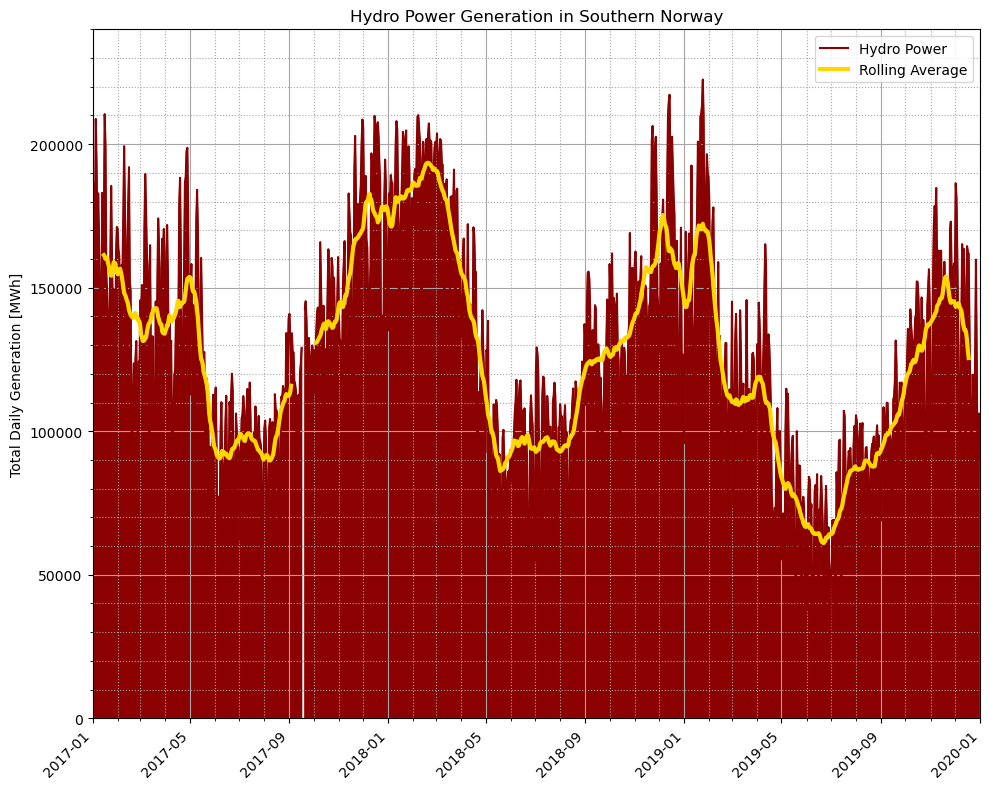

In [34]:
NO2Gen = pd.concat([NO2Gen2017["Wind [MWh]"], NO2Gen2018["Wind [MWh]"], NO2Gen2019["Wind [MWh]"]], ignore_index=True).to_frame("Wind [MWh]")
NO2Gen["PSH [MWh]"] = pd.concat([NO2Gen2017["PSH [MWh]"], NO2Gen2018["PSH [MWh]"], NO2Gen2019["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
NO2Gen["Hydro [MWh]"] = pd.concat([NO2Gen2017["Hydro [MWh]"], NO2Gen2018["Hydro [MWh]"], NO2Gen2019["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")
NO2Gen["Nuclear [MWh]"] = pd.concat([NO2Gen2017["Nuclear [MWh]"], NO2Gen2018["Nuclear [MWh]"], NO2Gen2019["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
NO2Gen["Gas [MWh]"] = pd.concat([NO2Gen2017["Gas [MWh]"], NO2Gen2018["Gas [MWh]"], NO2Gen2019["Gas [MWh]"]], ignore_index=True).to_frame("Gas [MWh]")
NO2Gen["Oil [MWh]"] = pd.concat([NO2Gen2017["Oil [MWh]"], NO2Gen2018["Oil [MWh]"], NO2Gen2019["Oil [MWh]"]], ignore_index=True).to_frame("Oil [MWh]")
NO2Gen["Coal [MWh]"] = pd.concat([NO2Gen2017["Coal [MWh]"], NO2Gen2018["Coal [MWh]"], NO2Gen2019["Coal [MWh]"]], ignore_index=True).to_frame("Coal [MWh]")
NO2Gen["Biomass [MWh]"] = pd.concat([NO2Gen2017["Biomass [MWh]"], NO2Gen2018["Biomass [MWh]"], NO2Gen2019["Biomass [MWh]"]], ignore_index=True).to_frame("Biomass [MWh]")
NO2Gen["Solar [MWh]"] = pd.concat([NO2Gen2017["Solar [MWh]"], NO2Gen2018["Solar [MWh]"], NO2Gen2019["Solar [MWh]"]], ignore_index=True).to_frame("Solar [MWh]")

NO2Gen["Date"] = pd.date_range(start="1/1/2017", periods=1095, freq="D")

NewOrder = ["Date", "Wind [MWh]", "PSH [MWh]", "Hydro [MWh]", "Nuclear [MWh]",
            "Gas [MWh]", "Oil [MWh]", "Coal [MWh]", "Biomass [MWh]", "Solar [MWh]"]

NO2Gen = pd.DataFrame(NO2Gen)

NO2Gen = NO2Gen.reindex(columns=NewOrder)

print(NO2Gen.dtypes)


######################################################################################################################

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

a = input("Choose generation type:", )

plt.title(f"{a} Power Generation in Southern Norway")
plt.ylabel('Total Daily Generation [MWh]')

ax.plot(NO2Gen["Date"], NO2Gen[f"{a} [MWh]"], color="darkred", label=f"{a} Power")
ax.plot(NO2Gen["Date"], NO2Gen[f"{a} [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
plt.fill_between(NO2Gen["Date"], NO2Gen[f"{a} [MWh]"], color="darkred")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_ylim())
b = input("Choose y limit: ", )

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(17167, 18262)
plt.ylim(0,int(b))
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()